# World Education | EDA
___

#### Usage Scenario
Jessica is a policy maker at the Ministry of Education and she has to come up with new policies to further improve education systems on a national scale. She frequently collaborates with researchers and international organizations and has to justify policy decisions using data. However, she is often overwhelmed by the amount of data across countries.

In order to do that, she first needs to understand what factors contribute to better education systems globally. She wants to explore a World education dataset to compare the effects of different variables and identify which of these variables affect education systems across the world the most and better create policies with the focus on these variables.

When Jessica logs on to our "World Education app", she will see an overview of all the available variables in the dataset, categorized by education level, gender, and socioeconomic factors. Then, she can select one of these variables such as out-of-school rates for lower secondary education to display on a global heat map and identify regions with particularly high rates.

Next, she compares this variable with other variables such as completion rates and youth literacy rates by using scatter plots and sees if there are any strong correlations between them. If she is interested in certain countries/ regions, she can filter data points to be those from countries of interest for more detailed analysis.

She can also compare the gender effects on several variables as well. For some regions where gender plays an important role in education, dropout rates might be higher for female students. By comparing these trends with birth rates and unemployment rates, she gains insight into how demographic and economic pressures may influence educational participation.

Based on her findings from using our app, Jessica hypothesizes that secondary completion rates, gender gaps, and youth literacy are strongly correlated with successful education systems across the world. These insights allow her to make data-driven policies such as policies to encourage students to stay in school or policies to help bridge gender gaps.

##### User Stories
User Story 1: As a policy maker, I want to filter and compare education indicators across countries and regions to identify geographic disparities in education outcomes.

User Story 2: As a policy maker, I want to analyze education indicators by gender to determine whether male and female students experience unequal access to education systems.

User Story 3: As a policy maker, I want to visualize education indicators on a world map and through comparative charts in order to quickly identify global patterns, trends, and outliers.

##### Jobs to Be Done
**JTBD 1:**

Situation: When I am evaluating the overall performance of education systems across countries,

Motivation: I want to compare key education indicators such as completion rates and literacy rates across regions,

Outcome: so I can identify which regions are lagging behind and require targeted policy attention.

**JTBD 2:** 

Situation: When designing policies to bridge gender inequality in education,

Motivation: I want to compare different education variables separately for male and female students across different education levels

Outcome: so I can identify gender-based disparities and design policies that promote equal access to education.

**JTBD 3:**

Situation: When I am reviewing large-scale global education data,

Motivation: I want to visualize education indicators on a global heat map,

Outcome: so I can quickly detect global patterns, trends, and outlier countries that require further investigation or policy intervention.



In [1]:
# libraries for data processing
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import seaborn as sns
import scienceplots


In [2]:
# setting up color schemes and themes

import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

#bodacious colors
colors_1 = sns.color_palette("rocket",6)
colors_2 = sns.color_palette("crest",6)

#Ram's colors, if desired
seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

In [3]:
# Importing the Data

data = pd.read_csv('../data/raw/Global_Education.csv', encoding='latin-1')
data.sample(10)

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
178,East Timor,8.874217,125.727539,51,48,7,3,12,9,27,...,0,0,0,0,82,85,29.42,115.3,17.8,4.55
101,Libya,26.335100,17.228331,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18.83,109.0,60.5,18.56
132,North Macedonia,41.608635,21.745275,51,51,1,1,0,0,0,...,0,0,45,39,0,0,0.00,0.0,0.0,0.00
109,Mali,17.570692,3.996166,53,57,38,44,49,56,71,...,0,0,0,0,58,43,41.54,75.6,4.5,7.22
166,South Africa,30.559482,22.937506,28,27,12,10,16,13,22,...,0,13,0,0,0,0,20.51,100.9,22.4,28.18
87,Italy,41.871940,12.567380,6,7,3,3,2,2,6,...,0,0,77,62,100,100,7.30,101.9,61.9,9.89
49,Democratic Republic of the Congo,4.038333,21.758664,0,0,0,0,0,0,0,...,0,0,0,0,0,0,41.18,108.0,6.6,4.24
154,San Marino,43.942360,12.457777,12,14,0,0,0,0,51,...,0,0,0,0,100,100,6.80,108.1,42.5,0.00
67,Georgia,42.315407,43.356892,0,0,2,2,1,2,7,...,0,0,36,39,0,0,13.47,98.6,63.9,14.40
169,Sri Lanka,7.873054,80.771797,0,0,2,3,0,0,18,...,0,0,0,0,99,99,15.83,100.2,19.6,4.20


In [4]:
print("checking null values and basic stats for the data\n")
data.info()
print('---'*20)
data.describe().T

checking null values and basic stats for the data

<class 'pandas.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    str    
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper

,count,mean,std,min,25%,50%,75%,max
Latitude,202.0,25.081422,16.813639,0.023559,11.685062,21.207861,39.901792,64.963051
Longitude,202.0,55.166928,45.976287,0.824782,18.665678,43.518091,77.684945,178.065032
OOSR_Pre0Primary_Age_Male,202.0,19.658416,25.007604,0.000000,0.000000,9.000000,31.000000,96.000000
OOSR_Pre0Primary_Age_Female,202.0,19.282178,25.171147,0.000000,0.000000,7.000000,30.000000,96.000000
OOSR_Primary_Age_Male,202.0,5.282178,9.396442,0.000000,0.000000,1.000000,6.000000,58.000000
OOSR_Primary_Age_Female,202.0,5.569307,10.383092,0.000000,0.000000,1.000000,6.750000,67.000000
OOSR_Lower_Secondary_Age_Male,202.0,8.707921,13.258203,0.000000,0.000000,2.000000,12.750000,61.000000
OOSR_Lower_Secondary_Age_Female,202.0,8.831683,14.724717,0.000000,0.000000,2.000000,10.750000,70.000000
OOSR_Upper_Secondary_Age_Male,202.0,20.292079,21.485592,0.000000,0.250000,15.000000,32.750000,84.000000
OOSR_Upper_Secondary_Age_Female,202.0,19.975248,23.140376,0.000000,0.250000,12.000000,30.000000,89.000000


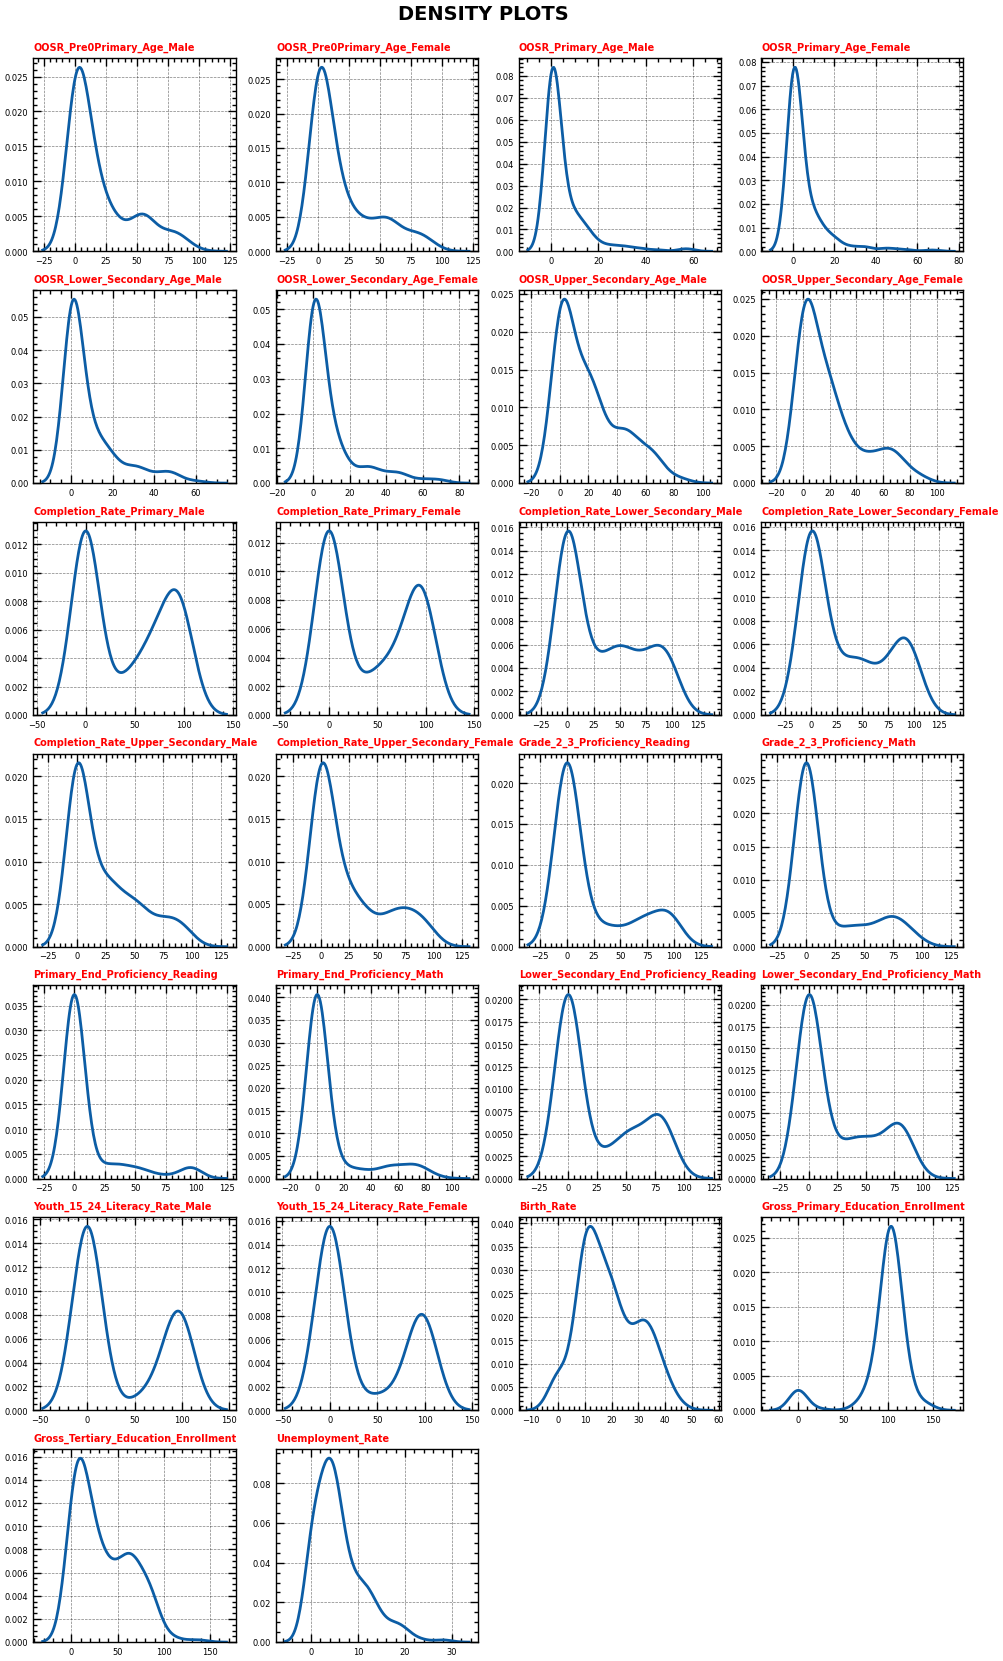

In [ ]:
# density plots
cols = [c for c in data.columns if c not in ['Latitude ', 'Longitude', 'Countries and areas']]
cols

fig = plt.figure(figsize=(12, 18), dpi=100)
gs = gridspec.GridSpec(7, 4, figure=fig)
gs.update(wspace=0.2, hspace=0.2)

for idx, col in enumerate(cols):
    ax = fig.add_subplot(gs[idx // 4, idx % 4])
    sns.kdeplot(x=col, data=data, ax=ax)
    ax.set_title(col, fontsize=7, color='red', fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='both', labelsize=6)

fig.suptitle('DENSITY PLOTS', fontsize=14, fontweight='bold', y=1.02)
fig.subplots_adjust(top=0.99)
plt.show()    

plt.show()

quite a lot of the distributions are bimodal, it will be interesting to see the nuanced trends behind this.

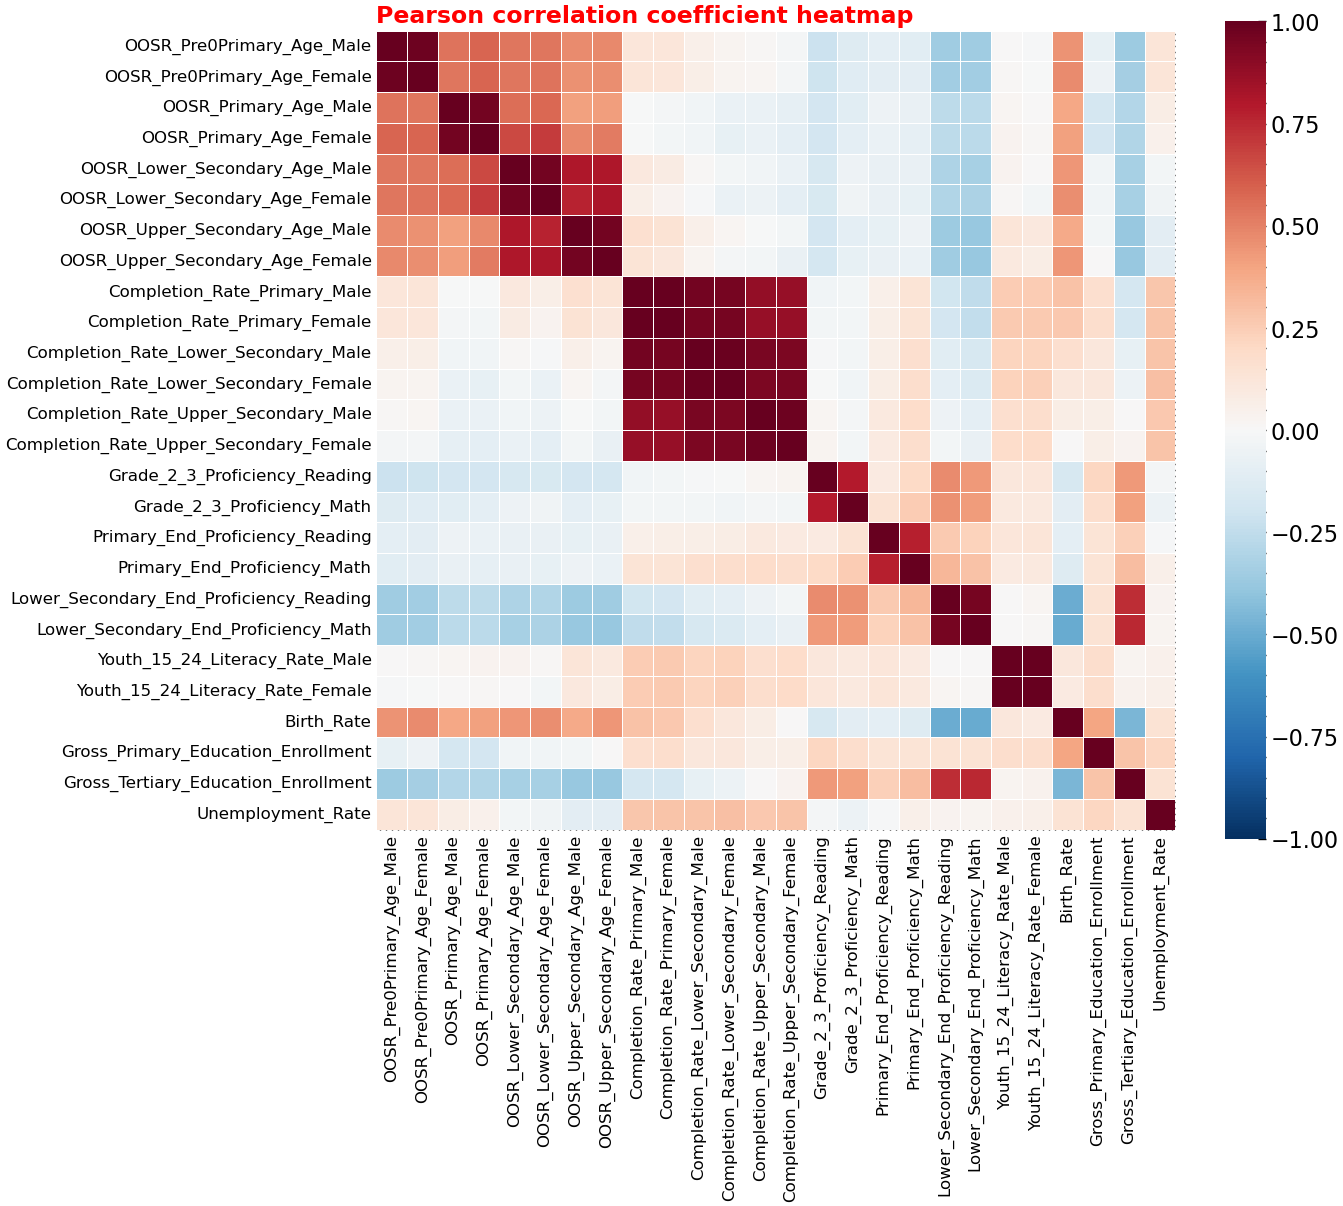

In [ ]:
# pearson correlation heatmap
corr = data[cols].corr()
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr, ax=ax, cmap='RdBu_r', center=0, vmin=-1, vmax=1, 
            square=True, linewidths=0.5, annot=False)

ax.set_title('Pearson correlation coefficient heatmap',
             fontsize=17, color='red', loc='left', fontweight='bold')

ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

there are some interesting correlation patterns showing up in the data. Assuming these are linear in nature, it would be interesting to see they unfold.